In [207]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

mu = 398600.4418  # km^3/s^2

##########################
# Mark's Equations
##########################

def solve_E_for_r(r, a, e):
    # def f(E): return a * (1 - e * np.cos(E)) - r
    try:
        # sol = root_scalar(f, bracket=[0, np.pi], method='brentq')
        # return sol.root if sol.converged else None
        print((1/e)*(1-r/a))
        E = np.arccos( (1/e)*(1-r/a) ) 
        # E = np.mod(E, 2 * np.pi)  # Ensure E is in [0, 2*pi]
        # cos_E1 = (1 - r / a) / e
        # sin_E1 = np.sqrt(1 - cos_E1**2)
        # E = np.arctan2(sin_E1, cos_E1)
        # E = np.mod(E, 2 * np.pi)
        return E
    except ValueError:
        return None

def compute_time_fractions_for_orbit(a, e, shell_edges):
    n = np.sqrt(mu / a**3) # mean motion, rad/s, EQUATION 3
    P = 2 * np.pi / n
    times = []

    # EQUATION 1 - r_low and r_high (apogee and perigee)
    r_min = a * (1 - e)
    r_max = a * (1 + e)

    for i in range(len(shell_edges) - 1):
        r_low = shell_edges[i]
        r_high = shell_edges[i + 1]
        # print(r_low-6371)
        # print(r_high-6371)

        # Check if shell overlaps orbit path
        # if the shell is outside the orbit path, skip it
        if r_high < r_min or r_low > r_max:
            times.append(0.0)
            continue

        # Clamp bounds to be inside orbit range
        r1 = max(r_low, r_min)
        r2 = min(r_high, r_max)
        # print(r1-6371)
        # print(r2-6371)

        # Solve for eccentric anomaly E1 and E2
        # corresponding to the radii r1 and r2
        E1 = solve_E_for_r(r1, a, e)
        E2 = solve_E_for_r(r2, a, e)
        print(f"r1: {r1-6371}, E1: {E1}, r2: {r2-6371}, E2: {E2}")
        # print(np.degrees(E1))
        # print(np.degrees(E2))

        if E1 is None or E2 is None:
            times.append(0.0)
            continue
        
        # EQUATION 2
        # Convert to mean anomaly
        M1 = E1 - e * np.sin(E1)
        M2 = E2 - e * np.sin(E2)

        # Finally, compute the time spent in the shell
        dt = 2 * (M2 - M1) / n # EQUATON 4
        times.append(dt)

    # Convert time list to array and divide by orbital period
    times = np.array(times)
    times /= P  # <-- now fractions are normalised w.r.t full orbital period, EQUATION 5
    return times


In [208]:
# np.degrees( np.arccos( (1/e_test)*(1-(1735 + 6371)/a_test) ) )
# np.arccos(np.radians(135))

0.9999999999999998
0.9496676163342832
r1: 262.90000000000055, E1: 2.1073424255447017e-08, r2: 300, E2: 0.3186231909887026
0.9496676163342832
0.8818342151675485
r1: 300, E1: 0.3186231909887026, r2: 350, E2: 0.4910584824843573
0.8818342151675485
0.8140008140008137
r1: 350, E1: 0.4910584824843573, r2: 400, E2: 0.6197893838463143
0.8140008140008137
0.746167412834079
r1: 400, E1: 0.6197893838463143, r2: 450, E2: 0.728509696163976
0.746167412834079
0.6783340116673453
r1: 450, E1: 0.728509696163976, r2: 500, E2: 0.8253034829280217
0.6783340116673453
0.6105006105006106
r1: 500, E1: 0.8253034829280217, r2: 550, E2: 0.9141038183620451
0.6105006105006106
0.5426672093338758
r1: 550, E1: 0.9141038183620451, r2: 600, E2: 0.9971870161873135
0.5426672093338758
0.47483380816714105
r1: 600, E1: 0.9971870161873135, r2: 650, E2: 1.0760211428578745
0.47483380816714105
0.4070004070004074
r1: 650, E1: 1.0760211428578745, r2: 700, E2: 1.1516285621913458
0.4070004070004074
0.33916700583367265
r1: 700, E1: 1.15

/var/folders/8r/pmy63vtd1lbbfd8ptmtgcr4w0000gn/T/ipykernel_9349/3182763667.py:17: RuntimeWarning: invalid value encountered in arccos
  E = np.arccos( (1/e)*(1-r/a) )


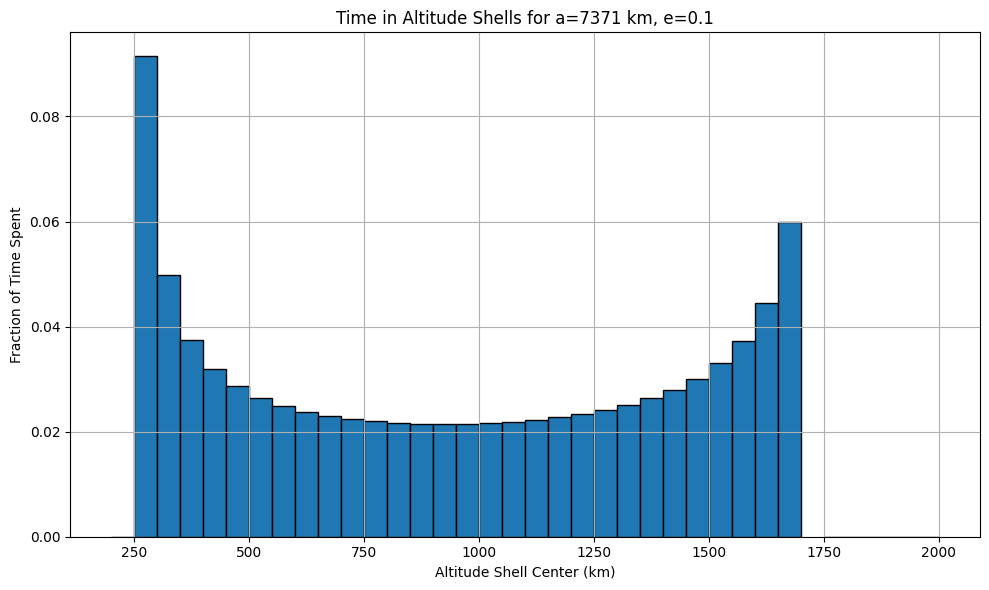

In [209]:
############################
# Test with a simple case
############################

# # Test parameters
a_test = 1000 + 6371  # semi-major axis in km
e_test = 0.1   # eccentricity

# r_p = 600 + 6371  # perigee radius in km
# r_a = 2000 + 6371  # apogee radius in km
# a_test = (r_p + r_a) / 2  # semi-major axis in km
# e_test = (r_a - r_p) / (r_a + r_p)  # eccentricity

# altitude_shells = np.array([
#     200., 250., 300., 350., 
#     400., 450., 500., 550., 600., 650., 700., 750., 800.,
#     850., 900., 950., 1000., 1050., 1100., 1150., 1200.,
#     1250., 1300., 1350., 1400., 1450., 1500., 1550., 1600.,
#     1650., 1700., 1750., 1800., 1850., 1900., 1950., 2000.
# ])

shell_width = 50  # km
altitude_shells = np.arange(200, 2000 + shell_width, shell_width)
shell_edges = altitude_shells + 6371 # Convert to sma


# Compute time fractions for test orbit
time_fractions = compute_time_fractions_for_orbit(a_test, e_test, shell_edges)

# sum time_fractions
total_time = np.sum(time_fractions)
print(f"Total time spent in all shells: {total_time:.2f}")

# Compute bin centers for plotting
altitude_bin_centers = (altitude_shells[:-1] + altitude_shells[1:]) / 2

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(altitude_bin_centers, time_fractions, width=shell_width, align='center', edgecolor='black')
plt.xlabel('Altitude Shell Center (km)')
plt.ylabel('Fraction of Time Spent')
plt.title(f'Time in Altitude Shells for a={a_test} km, e={e_test}')
plt.grid(True)
plt.tight_layout()
plt.show()

In [210]:
time_fractions

array([0.        , 0.09144955, 0.04984901, 0.03749706, 0.03190447,
       0.02861423, 0.02644332, 0.02492048, 0.02381638, 0.02300495,
       0.02241114, 0.0219879 , 0.02170484, 0.02154232, 0.02148805,
       0.02153532, 0.02168195, 0.02193   , 0.02228587, 0.02276097,
       0.02337313, 0.024149  , 0.02512823, 0.02637099, 0.02797193,
       0.03008873, 0.03300661, 0.03730903, 0.04445558, 0.05992671,
              nan, 0.        , 0.        , 0.        , 0.        ,
       0.        ])